<a href="https://colab.research.google.com/github/bartianbosch/Melk/blob/Jinli/Big_Data_Milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Data Groupwork Milk


In [1]:
# To download and update the necessary requirements, run this cell
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://security.ubuntu.com/ub

In [2]:
# To initialize Apache Spark, run this cell
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
sp = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Loading the data into a DF


In [3]:
!ls 'gdrive/MyDrive/'

'App ontwikkeling.gdoc'
 Big_Data_Groupwork_Project
 Bijbaan
'Bus 356 Connexion.gdoc'
'Citygames Delft:.gdoc'
'Colab Notebooks'
'Conneccie 2018-2019'
 CV
'DIPP meetings notebook.gdoc'
'edX courses, Udemy and more online courses.gdoc'
'(EUR) Erasmus Universiteit'
'Experiment 1 FP&D.gsheet'
'Experiment 1 FP&D.xlsx'
'Food Hazards Case Study Beer-Can Chicken.gdoc'
 GOT.gdoc
 Group39_Assignment2.gdoc
 Group39_Assignment4.gdoc
 IMG_5467.JPG
 IMG_5468.JPG
 IMG_5469.JPG
 IMG_5470.JPG
 IMG_5471.JPG
 INF33806
'Nooit meer vergeten'
'Online Examination Test 10 april 2020.gdoc'
'Quality Systems Operations Definitions sheet.gdoc'
 Roblox
'safari leeslijst.gdoc'
 Thee.gdoc
'Thymos evaluation survey 6 april 2020.gdoc'
 Vossius
'(VU) Vrije Universiteit'
 Wageningen
' Wild, Janniek de; Witsenboer, Jin-Li Food P&D practical 1, 2, 3 .gdoc'
'WSR ARGO ALV pagina.gdoc'


In [4]:
# Read the data from the csv file


#milk_rdd = spark.read.csv('gdrive/MyDrive/Big_Data_Groupwork/ff_dairy_v1.csv', header=True, inferSchema = True)
milk_rdd = spark.read.csv('/content/gdrive/MyDrive/Big_Data_Groupwork_Project/Big_Data_Groupwork/ff_dairy_v1.csv', header=True, inferSchema = True)

# work from dataframes is sufficient

In [ ]:
milk_rdd.show(5)

+----------+-------+----+---------+---------+----------------+------------+----------+----+------------------------------------------+-----------------------------------------------+---------------------------+---------------------------+-----------------+-----------------------+-----------+----+-----------------+---------------+----+--------+------------+--------------+--------+---------------------+---------+---------------------+-------------------------+-------+-----------------------+---------------+-------------------------------------+--------------------------------------+-----------------+-------------------------+-------------------+-----------------------+-------+-------------------------+--------------------------+--------------+------------------+------------------+----------------------+------------------+--------+-------------------+-------------+---------------------+-----------------+--------------+----------+---------+----------+----------+---------+----------+-------

Qusetion 1: 

Which combination of nutrients is the best predictor for the fat yield (milk yield * fat %) ?

In [5]:
# select the yield column and fat% column

subDF_null = milk_rdd.select('Milk yield (kg)', 'Fat%')
subDF_null.show(5)

subDF = subDF_null.dropna()
yield_col = subDF.select('Milk yield (kg)')
fat_pc_col = subDF.select('Fat%')

subDF.show(5)

fat_yield = list(map(lambda x, y : x*y, yield_col, fat_pc_col))

# or 

data = milk_rdd.toPandas()

milk_yield = data.loc[:, "Milk yield (kg)"]
fat = data.loc[:, "Fat%"]
total_fat = milk_yield * fat


+---------------+----+
|Milk yield (kg)|Fat%|
+---------------+----+
|          40.47|3.55|
|          38.29|null|
|          39.28|null|
|          38.16|null|
|          44.06|null|
+---------------+----+
only showing top 5 rows

+---------------+----+
|Milk yield (kg)|Fat%|
+---------------+----+
|          40.47|3.55|
|          40.12|3.49|
|          42.09|3.33|
|          36.26|3.45|
|          31.12|3.89|
+---------------+----+
only showing top 5 rows



In [69]:
# seletc the nutrient columns in g/day

# crude fiber, sugar, crude protein, crude fat, starch, Ca, P, Na, Cl, K, Mg, WDS, SPK, TPK, SPE, TPE, +I, Wi, GP 
# intestines: nXP, RNB, MELK, NEL, WDE, EKB

data_pandas = milk_rdd.toPandas()

cr_fiber_col = data_pandas.loc[:,'Crude fiber (g/day)'].dropna()
sugar_col = data_pandas.loc[:,'Sugar (g/day)']
cr_protein_col = data_pandas.loc[:,'Crude protein (g/day)']
cr_fat_col = data_pandas.loc[:,'Crude fat (g/day)']
starch_col = data_pandas.loc[:,'Starch (g/day)']

ca_col = data_pandas.loc[:,'Ca (g/day)']
p_col = data_pandas.loc[:,'P (g/day)']
na_col = data_pandas.loc[:,'Na (g/day)']
cl_col = data_pandas.loc[:,'Cl (g/day)']
k_col = data_pandas.loc[:,'K (g/day)']
mg_col = data_pandas.loc[:,'Mg (g/day)']

nutrients_selected = milk_rdd.select(['Fat%', 'Crude fiber (g/day)', 'Sugar (g/day)', 'Crude protein (g/day)', 'Crude fat (g/day)', 'Starch (g/day)', 
                             'Ca (g/day)', 'P (g/day)', 'Na (g/day)', 'Cl (g/day)', 'K (g/day)', 'Mg (g/day)']).dropna(subset = "Fat%")
nutrients = nutrients_selected.select([nutrients_selected[col].cast('float') for col in nutrients_selected.columns])

nutrients_pd = nutrients.select('*').toPandas()


**Import plot libraries**

In [46]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

from pyspark.ml.regression import LinearRegression

from pyspark.ml.feature import VectorAssembler

**Scatterplots**

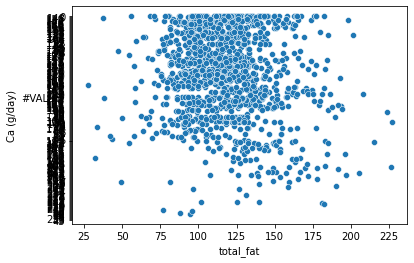

In [8]:
# create linear regression models 

#sns.scatterplot(x = total_fat, y = crude_fiber)

# or 

milk_rdd2 = milk_rdd.withColumn('total_fat', milk_rdd['Milk yield (kg)'] * milk_rdd['Fat%'])

sns.scatterplot(x='total_fat', y='Ca (g/day)', data=milk_rdd2.toPandas())


**Linear regression models**

In [32]:
corr_mat = data_pd.corr(method='pearson')
#plt.subplots(figsize=(30,30))

corr_mat.loc[:, "Fat%"]

#sns.heatmap(corr_mat, cmap='coolwarm')

assembler = VectorAssembler(
    inputCols = [col for col in nutrients.columns if col != "Fat%"],
    outputCol = "features")
output = assembler.transform(nutrients).select('features', 'Fat%')

test_data, train_data = output.randomSplit([0.8, 0.2], 0)
lr = LinearRegression(featuresCol = 'features', labelCol='Fat%')
lrModel = lr.fit(train_data)

Py4JJavaError: ignored

**Barplot**

In [57]:
df_corr = nutrients.corr('Fat%', 'Crude fiber (g/day)')
df_corr
#df_corr[['cor_fiber']].plot(kind='hist')

0.05765395562892454

In [58]:
print(type(total_fat))
print('hello')
print(type(cr_fiber_col))


"""
lines = plt.xcorr(total_fat, cr_fiber_col)

plot.title('Hypothetical Data: Angle of collision vs Energy lost')

plot.xlabel('Angle of collision')

plot.ylabel('Energy lost')    

plot.grid(True)

plot.axhline(0, color='red', lw=2)

plot.show()
"""

<class 'pandas.core.series.Series'>
hello
<class 'pandas.core.series.Series'>


"\nlines = plt.xcorr(total_fat, cr_fiber_col)\n\nplot.title('Hypothetical Data: Angle of collision vs Energy lost')\n\nplot.xlabel('Angle of collision')\n\nplot.ylabel('Energy lost')    \n\nplot.grid(True)\n\nplot.axhline(0, color='red', lw=2)\n\nplot.show()\n"

In [65]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
 
# Basic correlogram
#sns.pairplot(nutrients_pd)


**Correlation Matrix**

In [113]:
# fix the datatype

from pyspark.sql import functions as F
def fixType(datasetName, colName, dataType):
  """Takes a dataset and returns the dataset with the given column set to the given dataype"""
  return datasetName.withColumn(colName, F.col(colName).cast(dataType))

# Preparing Lists with the colum names and which type they need to be
allColumns = ['Cow number', 'Date', 'Barn', 'Barn part', 'Treatment', 'Lactation number', 'Days in milk', 'Day number', 'Week', 'Period (VP = preperiod, HP = trial period)', 'Period part (VP = preperiod, HP = trial period)', 'Intake basal ration (kg dm)', 'Intake total ration (kg dm)', 'Water intake (kg)', 'Concentrate intake (kg)', 'Weight (kg)', 'BCS', 'Backfat Thickness', 'Milk yield (kg)', 'Fat%', 'Protein%', 'Urea (mg/kg)', 'SCC (*1000/ml)', 'Lactose%', 'Avg Temperature (degC)', 'Air speed', 'Max temperature (degC)', 'Rumination time (min/day)', 'Avg pH', 'Avg Rumen Temperature ', 'Time pH<5,8 (h)', 'Manure consistency (1=fluid, 5= hard)', 'Manure fibre score (1=short, 5 = long)', 'Number of kernels', 'Manure sieving residu (%)', 'Manure dm (g/kg OM)', 'Manure starch (g/kg dm)', 'Urin-pH', 'Intake pre-period (kg dm)', 'Milk yield prepreriod (kg)', 'Fat% preperiod', 'Protein% preperiod', 'Fat preperiod (kg)', 'Protein preperiod (kg)', 'ECM preperiod (kg)', 'ECM (kg)', 'Crude fiber (g/day)', 'Sugar (g/day)', 'Crude protein (g/day)', 'Crude fat (g/day)', 'Starch (g/day)', 'Ca (g/day)', 'P (g/day)', 'Na (g/day)', 'Cl (g/day)', 'K (g/day)', 'Mg (g/day)', 'nXP (g/day)', 'RNB (g/day)', 'MELK (g/day)', 'NEL (g/day)', 'WDE (g/day)', 'EKB (g/day)', 'WDS (g/day)', 'SPK (g/day)', 'TPK (g/day)', 'SPE (g/day)', 'TPE (g/day)', 'plusI (/day)', 'WI (/day)', 'GP (g/day)', 'Crude fiber (g/kg dm)', 'Sugar (g/kg dm)', 'Crude protein (g/kg dm)', 'Crude fat (g/kg dm)', 'Starch (g/kg dm)', 'Ca (g/kg dm)', 'P (g/kg dm)', 'Na (g/kg dm)', 'Cl (g/kg dm)', 'K (g/kg dm)', 'Mg (g/kg dm)', 'nXP (g/kg dm)', 'RNB (g/kg dm)', 'MELK (/kg dm)', 'NEL (MJ/kg dm)', 'WDE (g/kg dm)', 'EKB (g/kg dm)', 'WDS (g/kg dm)', 'SPK (g/kg dm)', 'TPK (g/kg dm)', 'SPE (g/kg dm)', 'TPE (g/kg dm)', 'plusI (/kg dm)', 'WI (/kg dm)', 'GP (g/kg dm)']
doubleColumns = ['Intake basal ration (kg dm)', 'Intake total ration (kg dm)', 'Water intake (kg)', 'Concentrate intake (kg)', 'Weight (kg)', 'BCS', 'Milk yield (kg)', 'Fat%', 'Protein%', 'Lactose%', 'Avg Temperature (degC)', 'Air speed', 'Max temperature (degC)', 'Avg pH', 'Avg Rumen Temperature ', 'Time pH<5,8 (h)', 'Number of kernels', 'Manure sieving residu (%)', 'Manure starch (g/kg dm)', 'Urin-pH', 'Intake pre-period (kg dm)', 'Milk yield prepreriod (kg)', 'Fat% preperiod', 'Protein% preperiod', 'Fat preperiod (kg)', 'Protein preperiod (kg)', 'ECM preperiod (kg)', 'ECM (kg)']
intColumns = ['Cow number', 'Barn', 'Barn part', 'Lactation number', 'Days in milk', 'Day number', 'Week', 'Backfat Thickness', 'Urea (mg/kg)', 'SCC (*1000/ml)', 'Rumination time (min/day)', 'Manure consistency (1=fluid, 5= hard)', 'Manure fibre score (1=short, 5 = long)', 'Manure dm (g/kg OM)', 'Crude fiber (g/day)', 'Sugar (g/day)', 'Crude protein (g/day)', 'Crude fat (g/day)', 'Starch (g/day)', 'Ca (g/day)', 'P (g/day)', 'Na (g/day)', 'Cl (g/day)', 'K (g/day)', 'Mg (g/day)', 'nXP (g/day)', 'RNB (g/day)', 'MELK (g/day)', 'NEL (g/day)', 'WDE (g/day)', 'EKB (g/day)', 'WDS (g/day)', 'SPK (g/day)', 'TPK (g/day)', 'SPE (g/day)', 'TPE (g/day)', 'plusI (/day)', 'WI (/day)', 'GP (g/day)', 'Crude fiber (g/kg dm)', 'Sugar (g/kg dm)', 'Crude protein (g/kg dm)', 'Crude fat (g/kg dm)', 'Starch (g/kg dm)', 'Ca (g/kg dm)', 'P (g/kg dm)', 'Na (g/kg dm)', 'Cl (g/kg dm)', 'K (g/kg dm)', 'Mg (g/kg dm)', 'nXP (g/kg dm)', 'RNB (g/kg dm)', 'MELK (/kg dm)', 'NEL (MJ/kg dm)', 'WDE (g/kg dm)', 'EKB (g/kg dm)', 'WDS (g/kg dm)', 'SPK (g/kg dm)', 'TPK (g/kg dm)', 'SPE (g/kg dm)', 'TPE (g/kg dm)', 'plusI (/kg dm)', 'WI (/kg dm)', 'GP (g/kg dm)']
stringColumn = ['Treatment', 'Period (VP = preperiod, HP = trial period)', 'Period part (VP = preperiod, HP = trial period)']
milk_rdd2 = milk_rdd

# Setting the columns to the correct type
for colName in doubleColumns:
  milk_rdd2 = fixType(milk_rdd2, colName, "double")
for colName in intColumns:
  milk_rdd2 = fixType(milk_rdd2, colName, "int")
milk_rdd2 = milk_rdd2.withColumn("Date", F.col("Date").cast("date"))


AnalysisException: ignored

In [117]:
#
# create column dataframe without NULL values -> returns a series object
cr_fiber_col2 = data_pandas.loc[:,'Crude fiber (g/day)'].dropna()
sugar_col2 = data_pandas.loc[:,'Sugar (g/day)'].dropna()
cr_protein_col2 = data_pandas.loc[:,'Crude protein (g/day)'].dropna()
cr_fat_col2 = data_pandas.loc[:,'Crude fat (g/day)'].dropna()
starch_col2 = data_pandas.loc[:,'Starch (g/day)'].dropna()

ca_col2 = data_pandas.loc[:,'Ca (g/day)'].dropna()
p_col2 = data_pandas.loc[:,'P (g/day)'].dropna()
na_col2 = data_pandas.loc[:,'Na (g/day)'].dropna()
cl_col2 = data_pandas.loc[:,'Cl (g/day)'].dropna()
k_col2 = data_pandas.loc[:,'K (g/day)'].dropna()
mg_col2 = data_pandas.loc[:,'Mg (g/day)'].dropna()

# create a list/array from the columns -> returns a list/array
cr_fiber_array = cr_fiber_col2.values
sugar_array = sugar_col2.values
cr_protein_array = cr_protein_col2.values
cr_fat_array = cr_fat_col2.values
starch_array = starch_col2.values

ca_array = ca_col2.values
p_array = p_col2.values
na_array = na_col2.values
cl_array = cl_col2.values
k_array = k_col2.values
mg_array = mg_col2.values

# fix the datatype

from pyspark.sql import functions as F
def fixType(datasetName, colName, dataType):
  """Takes a dataset and returns the dataset with the given column set to the given dataype"""
  return datasetName.withColumn(colName, F.col(colName).cast(dataType))

cr_fiber_array = fixType(data_pandas, 'Crude fiber (g/day)', 'int' )

for colName in doubleColumns:
  milk_rdd2 = fixType(milk_rdd2, colName, "double")

# create a dictionary from the arrays

data_dict = {'cr_fiber': cr_fiber_array, 
             'sugar':sugar_array,
             'cr_protein':cr_protein_array,
             'cr_fat':cr_fat_array,
             'starch':starch_array,
             'ca':ca_array,
             'p':p_array,
             'na':na_array,
             'cl':cl_array,
             'k':k_array,
             'mg':mg_array }

# create a panda dataframe from the dictionary

nutrients_pd_df = pd.DataFrame(data_dict, columns=['cr_fiber', 'sugar', 'cr_protein', 'cr_fat', 'starch', 'ca', 'p', 'na', 'cl', 'k', 'mg'])
short_df = pd.DataFrame(data_dict, columns=['cr_fiber', 'sugar', 'cr_protein',])
print(short_df)


print(short_df.dtypes)


# create a correlation matrix

corrMatrix = short_df.corr()
print(corrMatrix)

#nutrients_corr_mat = nutrients_pd_df.corr()
#print(nutrients_corr_mat)

AttributeError: ignored

**Line plots**

In [9]:
cr_fiber_col = data_pandas.loc[:,'Crude fiber (g/day)'].dropna()

yield_fiber = milk_rdd.select('Milk yield (kg)', 'Fat%', 'Crude fiber (g/day)').dropna()
# nr of rows of all three columns = 1337

cr_fiber_col2 = yield_fiber.select('Crude fiber (g/day)')
yield_fiber_total = yield_fiber.withColumn('total_fat', milk_rdd['Milk yield (kg)'] * milk_rdd['Fat%'])
# add an extra column fat yield
fat_yield2 = yield_fiber_total.select('total_fat')

type(cr_fiber_col) # pandas series
type(fat_yield2) # dataframe



pyspark.sql.dataframe.DataFrame

**Pandas basic information**

In [10]:
milk_data = pd.read_csv('/content/gdrive/MyDrive/Big_Data_Groupwork_Project/Big_Data_Groupwork/ff_dairy_v1.csv')

UnicodeDecodeError: ignored